In [1]:
import numpy as np
import pandas as pd

In [27]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
plt.rcParams.update({'figure.figsize': [15,10]})

In [2]:
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Data_Test.xlsx')
train_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [3]:
test_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [4]:
Train_df = train_df.copy()
Test_df = train_df.copy()

In [5]:
print(train_df.shape)
print(test_df.shape)

(6237, 9)
(1560, 8)


In [6]:
train_df.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

### Data Cleaning

#### Reviews

In [7]:
train_df['Reviews'] = train_df.Reviews.str.replace(' out of 5 stars', '')
test_df['Reviews'] = test_df.Reviews.str.replace(' out of 5 stars', '')

In [8]:
train_df.Reviews.unique()

array(['4.0', '3.9', '4.8', '4.1', '5.0', '4.5', '4.4', '4.7', '4.2',
       '4.9', '3.5', '3.8', '4.3', '3.1', '4.6', '2.0', '3.7', '3.2',
       '2.6', '2.8', '3.4', '2.9', '3.3', '3.0', '2.5', '1.0', '3.6',
       '2.7', '1.5', '2.3', '1.7', '2.2', '1.4', '2.4', '1.6', '2.1'],
      dtype=object)

#### Ratings

In [9]:
train_df['Ratings'] = train_df.Ratings.str.replace(' customer reviews', '')
train_df['Ratings'] = train_df.Ratings.str.replace(' customer review', '')
test_df['Ratings'] = test_df.Ratings.str.replace(' customer reviews', '')
test_df['Ratings'] = test_df.Ratings.str.replace(' customer review', '')

In [10]:
train_df.Ratings.unique()

array(['8', '14', '6', '13', '1', '72', '16', '111', '132', '17', '4',
       '3', '5', '2', '23', '76', '10', '9', '15', '34', '32', '49', '62',
       '61', '7', '18', '98', '12', '97', '285', '29', '27', '267', '24',
       '146', '95', '234', '35', '66', '20', '39', '171', '399', '42',
       '142', '11', '839', '47', '165', '30', '53', '77', '33', '37',
       '54', '28', '50', '197', '26', '114', '46', '51', '161', '135',
       '41', '156', '1,416', '93', '221', '36', '154', '74', '45', '240',
       '55', '19', '48', '404', '245', '22', '292', '25', '75', '381',
       '44', '443', '425', '21', '238', '84', '68', '108', '52', '57',
       '109', '89', '304', '96', '419', '205', '85', '960', '71', '167',
       '58', '40', '102', '101', '65', '70', '106', '922', '31', '38',
       '63', '177', '138', '164', '257', '207', '64', '56', '196', '82',
       '1,558', '567', '60', '80', '303', '73', '193', '155', '798',
       '128', '87', '90', '286', '565', '137', '99', '403', '277',

#### Genre & BookCategory

In [11]:
train_df['Genre'].nunique()

345

In [12]:
train_df['BookCategory'].nunique()

11

In [13]:
train_df['Author'].nunique()

3679

In [28]:
print(train_df['Edition'].unique())

['Paperback,– 10 Mar 2016' 'Paperback,– 7 Nov 2012'
 'Paperback,– 25 Feb 1982' 'Paperback,– 5 Oct 2017'
 'Hardcover,– 10 Oct 2006' 'Paperback,– 5 May 2009'
 'Hardcover,– Import, 1 Mar 2018' 'Paperback,– 15 Dec 2015'
 'Paperback,– 26 Mar 2013' 'Paperback,– 20 Jan 2017'
 'Paperback,– Import, 14 Jun 2018' 'Paperback,– 1 Jul 1999'
 'Paperback,– 15 Nov 2002' 'Paperback,– 1 Sep 2011'
 'Paperback,– 26 Feb 2015' 'Hardcover,– 8 Mar 2018'
 'Paperback,– 1 Nov 2016' 'Mass Market Paperback,– 1 Jan 1991'
 'Paperback,– 2016' 'Hardcover,– 24 Nov 2018'
 'Paperback,– Import, 4 Oct 2018' 'Paperback,– 5 Jul 2012'
 'Paperback,– 1 Nov 2014' 'Paperback,– 31 Aug 2012'
 'Hardcover,– Deckle Edge, 18 Oct 2011' 'Paperback,– 1 Mar 2016'
 'Paperback,– Box set, 15 Jun 2014' 'Hardcover,– 15 Sep 2014'
 'Paperback,– 23 Apr 1989' 'Paperback,– 21 Nov 2013'
 'Paperback,– 21 Jul 2015' 'Paperback,– 14 Oct 2000'
 'Paperback,– 5 Sep 2005' 'Hardcover,– 10 May 2016' 'Paperback,– 2019'
 'Paperback,– 11 Jun 2014' 'Paperback,– 17 

In [46]:
end_col_words = ['Paperback']
#, 'Hardcover', 'Cards','Abridged','Unabridged','International', 'Audiobook', 'Box set', 'Facsimile']
for word in end_col_words:
    word = word.lower()
    train_df.loc[train_df[train_df['Edition'].str.lower().str.contains(word)].index, 'Edition_'+word] = 1

train_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_paperback,Edition_hardcover,Edition_cards,Edition_abridged,Edition_unabridged,Edition_international,Edition_audiobook,Edition_box set,Edition_fascimile,Edition_facsimile
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
train_df.isnull().sum()

Title                0
Author               0
Edition              0
Reviews              0
Ratings              0
Synopsis             0
Genre                0
BookCategory         0
Price                0
Edition_paperback    0
dtype: int64

In [45]:
len(train_df)

6237

In [49]:
train_df = train_df.drop([ 'Edition_hardcover',        
'Edition_cards',            
'Edition_abridged',         
'Edition_unabridged',       
'Edition_international',    
'Edition_audiobook',        
'Edition_box set',
'Edition_fascimile',        
'Edition_facsimile'], axis = 1)

In [53]:
train_df = train_df.fillna(0)

In [55]:
train_df.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Edition_paperback'],
      dtype='object')

In [71]:
train_df['Reviews'] = train_df['Reviews'].astype('float')
train_df['Ratings'] = train_df['Ratings'].str.replace(',','').astype('float')

### EDA

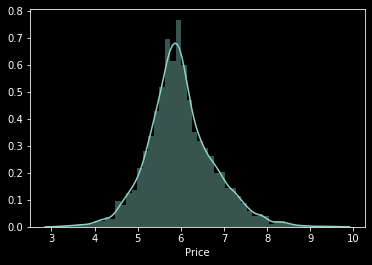

In [61]:
sns.distplot(np.log(train_df['Price']))

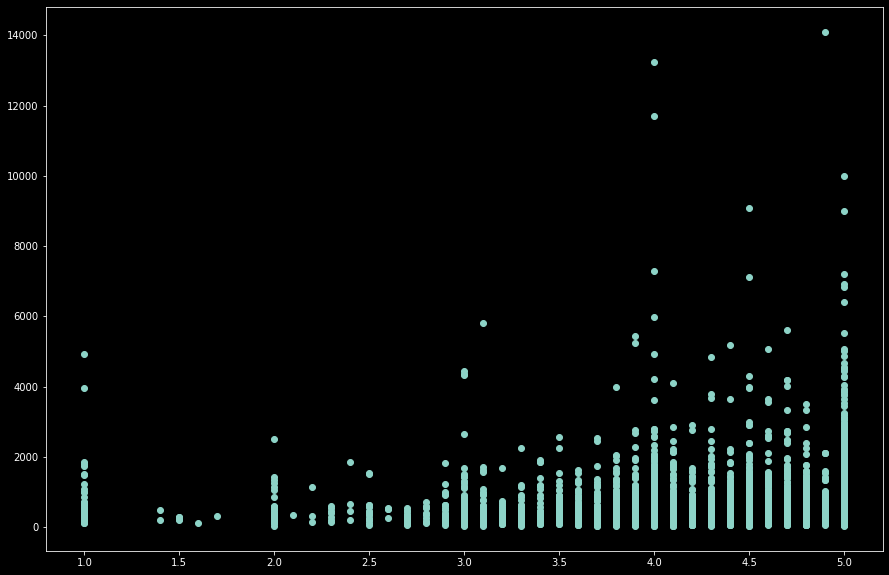

In [72]:
plt.scatter(train_df['Reviews'], train_df['Price'])

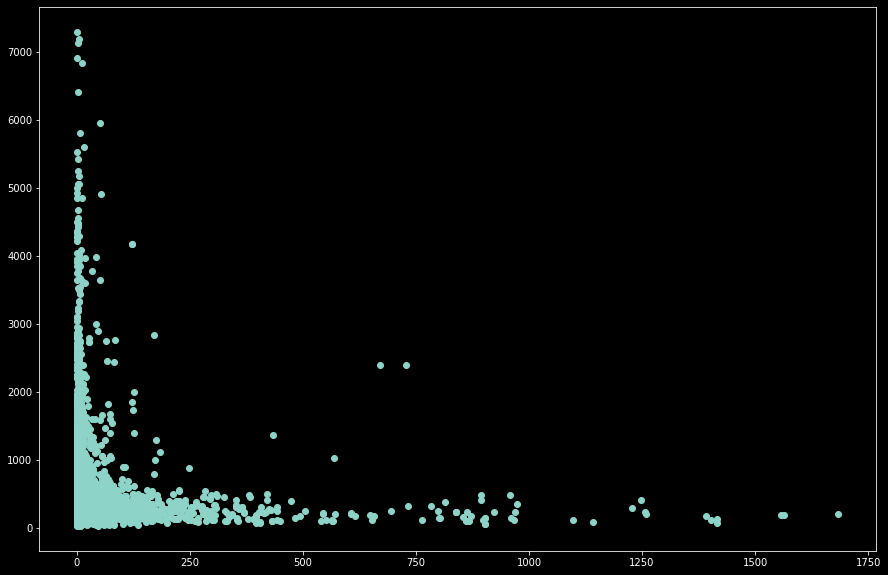

In [83]:
plt.scatter(train_df[(train_df['Ratings']< 2000) & (train_df['Price']< 8000)]['Ratings'],
            train_df[(train_df['Ratings']< 2000) & (train_df['Price']< 8000)]['Price'])

<Figure size 3600x3600 with 0 Axes>

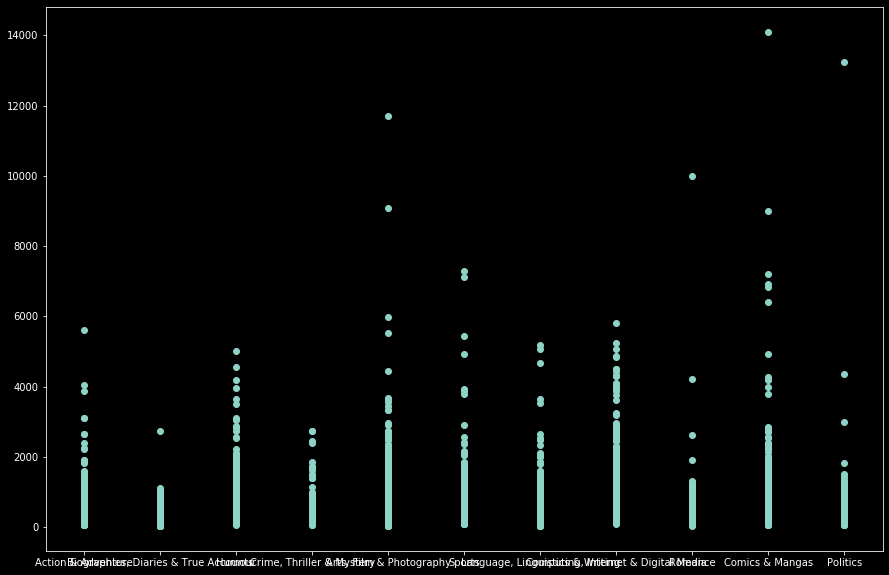

<Figure size 3600x3600 with 0 Axes>

In [93]:
plt.scatter(train_df['BookCategory'], train_df['Price'])

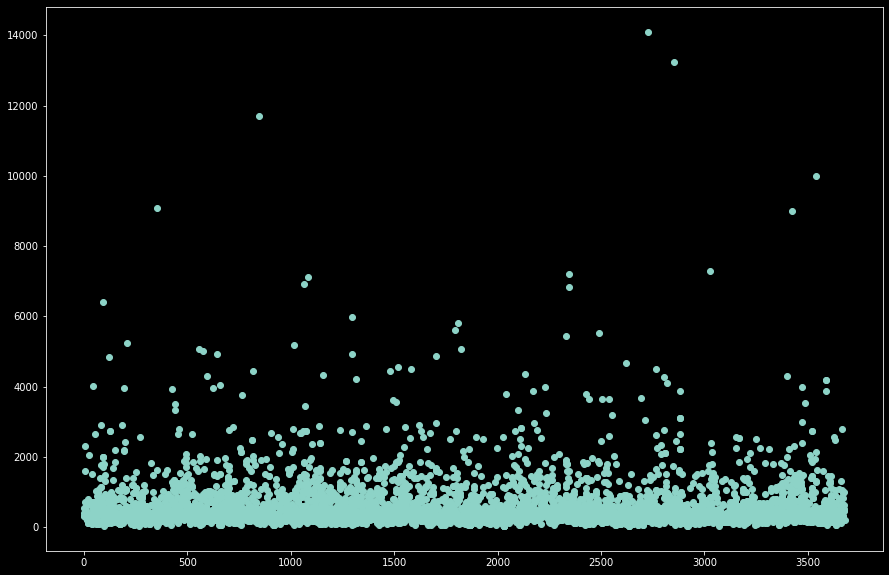

In [95]:
plt.scatter(LabelEncoder().fit_transform(train_df['Author']), train_df['Price'])